# Marginal Stability Vehicle Sizing
This sheet uses <code>numpy, matplotlib, simulations, and tank_sizing_9_20</code>.

<code>simulations</code> is developed and maintained (no promises) by Cameron. The current version of the code is 0.0.1 and can be downloaded from github [here](https://github.com/cmflannery/simulations). The source-code is not currently on pip.

In [1]:
from simulations import simulations as sim
unit = sim.unit()
import matplotlib.pyplot as plt
import numpy as np
import tank_sizing_9_20 as tank
from scipy import interpolate as inter

In [2]:
def plot_alt(fig):
    # plot altitude
    ax1 = fig.add_subplot(3,1,1)
    ax1.xaxis.grid(linewidth=1.0)
    ax1.yaxis.grid(linewidth=1.0)
    ax1.grid(True, linewidth=1)
    ax1.plot(time,altitude)
    ax1.set_ylabel('Altitude (ft)')

    ax1.set_title('Altitude and Velocity')

    # plot velocity
    ax2 = fig.add_subplot(3,1,2)
    ax2.xaxis.grid(linewidth=1.0)
    ax2.yaxis.grid(linewidth=1.0)
    ax2.grid(True, linewidth=1)
    ax2.plot(time,velocity)
    ax2.set_ylabel('Velocity (ft/s)')
    ax2.set_ylim(bottom=-6000)

    # plot acceleration
    gees = [x/g0Imp for x in acceleration]
    ax3 = fig.add_subplot(3,1,3)
    ax3.xaxis.grid(linewidth=1.0)
    ax3.yaxis.grid(linewidth=1.0)
    ax3.grid(True, linewidth=1)
    ax3.plot(time,gees)
    ax3.set_ylabel('Acceleration (gees)')
    ax3.set_xlabel('Time (s)')
    ax3.set_ylim(bottom=-2)
    
def plot_thrust(fig):
    # plot thrust
    ax = fig.add_subplot(2,1,1)
    ax.xaxis.grid(linewidth=1.0)
    ax.yaxis.grid(linewidth=1.0)
    ax.grid(True, linewidth=1)
    ax.plot(time,thrust)
    ax.set_ylabel('Thrust (lbf)')
    
    ax.set_title('Thrust and Drag')
    
    # plot drag
    ax1 = fig.add_subplot(2,1,2)
    ax1.xaxis.grid(linewidth=1.0)
    ax1.yaxis.grid(linewidth=1.0)
    ax1.grid(True, linewidth=1)
    ax1.plot(time,drag)
    ax1.set_ylabel('Drag (lbf)')
    ax1.set_ylim(0,2e5)

In [3]:
thrust_sl = 5000 # s

nengines = 1
burntime = 40  # s
chamberpressure = 500 #psi
Isp = 281.622 #s
#Isp as a function of chamber pressure might be a useful addition
mdot = nengines*thrust_sl/(Isp) #lbm/s (calc results in lbf/s, but conversion factor is 1)
twratio = 50  # estimated thrust 2 weight ratio
mixtureratio = 2.275
g0Metric = 9.81 #m/s^2
g0Imp = 32.17 #ft/s^2

mstructure = 219.12  # lbm
mavionics = 22.67  # lbm
msystems = 67.8 # lbm
mmisc = 0 #lbm
#mengine = thrust_sl*nengines/twratio #lbm
mpropulsion = 47.79 # lbm
mpropellant = mdot*burntime


diameter = 12 #in

mRP1 = mpropellant / (mixtureratio + 1)
mLOx = mpropellant - mRP1

rp1tankpressure = 700 #psi
loxtankpressure = 600 #psi
HEinitialpressure = 6000 #psi

mtank, mHe, lenloxin, lenrp1in = tank.getTankMassLen(loxtankpressure,rp1tankpressure,diameter,mpropellant,HEinitialpressure)
mpress = 282.38

mpropellant += mHe

refArea = np.pi*((diameter/2)**2) / 144 #ft^2

m0 = mpropulsion + mpropellant + mstructure + mavionics + msystems + mmisc + mtank + mpress
#m0 = m0 - 11.71 tentative correction for raceway and harnessing

print('### STRUCTURAL PARAMETERS ###')
print('Propellant Mass = %.2f lbm' % (mpropellant - mHe))
print('Helium Mass =  %.2f lbm'  % mHe)
print('Propulsion Mass = %.2f lbm' % mpropulsion)
print('Tank Mass = %.2f lbm' % mtank)
print('Pressurant Tank Mass = %.2f lbm' % mpress)
print('Structural Mass (inc. Tanks) = %.2f lbm' % (mstructure + mtank + mpress))
print('Systems Mass = %.2f lbm' % msystems)
print('Misc Mass = %.2f lbm' % mmisc)
print('Avionics Mass = %.2f lbm' % mavionics)
print('Mass Propellant Ratio (Mprop/M0) %.2f' % (mpropellant/m0))
print('Total Wet Mass: %.2f lbm' % (m0))
print('Total Dry Mass: %.2f lbm' % (m0-mpropellant))
print('\n### ENGINE PARAMETERS ###')
print('Thrust = %d lbf' % (thrust_sl*nengines))
print('Isp = %.2f s' % Isp)
print('mdot = %.2f lbm/s' % mdot)
print('Total Impulse = %i lbf-s' % (thrust_sl*burntime*nengines))

print('\n### OTHER IMPORTANT THINGS ###')
print('Burn Time = %.2f s' % burntime)

initialConditions = {
    'time': 0,
    'velocity': 0,
    'flight_angle': 0,
    'flight_heading': np.deg2rad(90),
    'latitude': 0,
    'longitude': 0,
    'altitude': 4460, # ft
    'mass': unit.lbmToSlug(m0),
    'heat': 0,
    'lift_coefficient': 0,
    'bank_angle': 0,
    'reference_area': refArea
}

engines = {
    'thrust_sl': thrust_sl,
    'thrust_angle': 0,
    'Isp': Isp,
    'Ae': 2.690978,
    'nengines': nengines
}

timestep = 0.2

### STRUCTURAL PARAMETERS ###
Propellant Mass = 710.17 lbm
Helium Mass =  8.85 lbm
Propulsion Mass = 47.79 lbm
Tank Mass = 120.70 lbm
Pressurant Tank Mass = 282.38 lbm
Structural Mass (inc. Tanks) = 622.20 lbm
Systems Mass = 67.80 lbm
Misc Mass = 0.00 lbm
Avionics Mass = 22.67 lbm
Mass Propellant Ratio (Mprop/M0) 0.49
Total Wet Mass: 1479.48 lbm
Total Dry Mass: 760.46 lbm

### ENGINE PARAMETERS ###
Thrust = 5000 lbf
Isp = 281.62 s
mdot = 17.75 lbm/s
Total Impulse = 200000 lbf-s

### OTHER IMPORTANT THINGS ###
Burn Time = 40.00 s


In [4]:
itsatest = sim.Rocket(initialConditions, engines,burntime,timestep)
altitude, velocity, acceleration, mass, time, thrust, drag, Q, rho, temperature, mach = itsatest.run()

4656.955047
4656.9543430673075
4657.02504141418
4657.16666662374
4657.379416114466
4657.663468170349
4658.018981643905
4658.446095637632
4658.944929235161
4659.51558193859
4660.158133807303
4660.872644754328
4661.659151854166
4662.517673727858
4663.448209330787
4664.450732720744
4665.52520154152
4666.671549156715
4667.889689100781
4669.179513300858
4670.540892840115
4671.973675709209
4673.4776904622
4675.05274307573
4676.698618885405
4678.415079081523
4680.201865799425
4682.058699616998
4683.985277919547
4685.981276850575
4688.046351450711
4690.1801354749405
4692.382241505086
4694.652259689902
4696.989759349222
4699.394288758814
4701.865374987691
4704.40252419562
4707.005221630016
4709.672932014165
4712.405099390981
4715.2011470903535
4718.060478927318
4720.982478586729
4723.966509688535
4727.011915178308
4730.11802028201
4733.284130067266
4736.5095321217
4739.793493623401
4743.1352627922615
4746.534072130396
4749.989135784805
4753.499647025916
4757.06478702842
4760.683714922701
4764.3

Apogee = 308392 ft
Apogee = 93 km
Max Velocity = 3934.74 ft/s
Max Acceleration = 5.02 gees
Max Q = 14.04 psi
Max Drag = 825.94 lbf


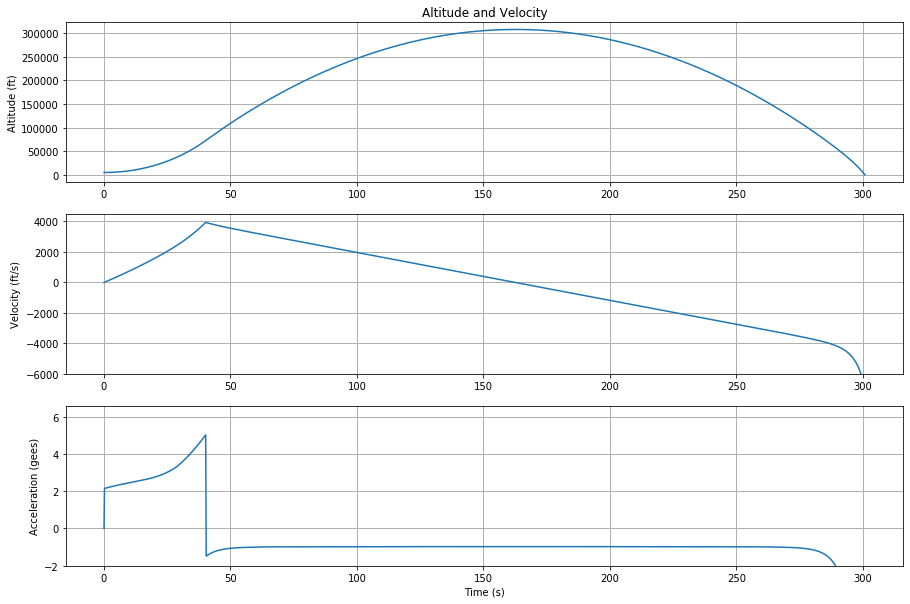

In [5]:
kmaltitude = [unit.ftToM(x)/1000 for x in altitude]
QPsi = [unit.psfToPsi(x) for x in Q]

print('Apogee = %d ft' % max(altitude))
print('Apogee = %d km' % max(kmaltitude))
print('Max Velocity = %.2f ft/s' % max(velocity))
gees = [a/g0Imp for a in acceleration]
print('Max Acceleration = %.2f gees' % max(gees))
print('Max Q = %.2f psi' % max(QPsi))
Drag = drag[0:len(Q)]
print('Max Drag = %.2f lbf' % max(Drag))

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.2)

# fig2 = plt.figure(figsize=(15,10))
# fig2.subplots_adjust(hspace=0.2)

plot_alt(fig)
plt.show()

In [6]:
def maxAndTime(list):
    max = 0
    time = 0
    for i in range(len(list)):
        if list[i] > max:
            max = list[i]
            point = i
            time = i*timestep
    return (max,point,time)

maxQ, maxQPoint, maxQTime = maxAndTime(QPsi)
print("Max Q = %.2f psi" % maxQ)
print("Time of max Q = %d s" % maxQTime)
print("Altitude at max Q = %.2f ft" % altitude[maxQPoint])
print("Velocity at max Q = %.2f ft/s" % velocity[maxQPoint])
print("Air density at max Q = %.7f slug/ft^3" % rho[maxQPoint])
print("Drag at max Q = %.2f lbf" % drag[maxQPoint])

print()


maxV, maxVPoint, maxVTime = maxAndTime(velocity[0:int(200/timestep)])
print("Max velocity = %.2f ft/s" % maxV)
print("Time of max velocity = %d s" % maxVTime)
print("Altitude at max velocity = %.2f ft" % altitude[maxVPoint])
print("Q at max velocity = %.2f psi" % QPsi[maxVPoint])
print("Air density at max velocity = %.7f slug/ft^3" % rho[maxVPoint])

print()

print("Height at burnout = %.2f ft" % altitude[int(burntime/timestep)])
print("Velocity at burnout = %.2f ft/s" % velocity[int(burntime/timestep)])

Max Q = 14.04 psi
Time of max Q = 28 s
Altitude at max Q = 35426.55 ft
Velocity at max Q = 2362.33 ft/s
Air density at max Q = 0.0007378 slug/ft^3
Drag at max Q = 825.94 lbf

Max velocity = 3934.74 ft/s
Time of max velocity = 40 s
Altitude at max velocity = 72364.96 ft
Q at max velocity = 6.73 psi
Air density at max velocity = 0.0001273 slug/ft^3

Height at burnout = 71584.47 ft
Velocity at burnout = 3902.46 ft/s


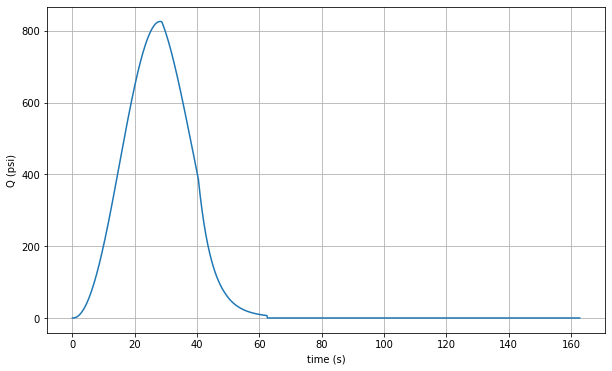

In [7]:
shortTime = time[0:len(Q)]
fig1 = plt.figure(figsize=(10,6))
ax11 = fig1.add_subplot(1,1,1)
ax11.plot(shortTime,drag[:len(shortTime)])
ax11.set_title('')
ax11.set_xlabel('time (s)')
ax11.set_ylabel('Q (psi)')
ax11.grid()
plt.show()

/Users/Confusion/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


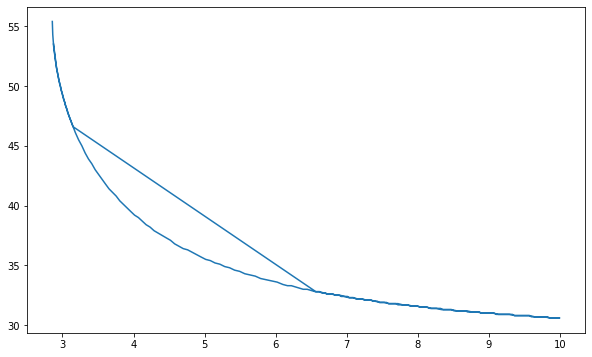

In [9]:
gamma = 7/5
def tantheta(M,B):
    b = np.radians(B)
    num = 2*((M**2)*(np.sin(b)**2) - 1)
    den = np.tan(b)*((M**2)*(gamma + (np.cos(b)**2)) + 2)
    return num/den

maxmach = max(mach[:len(shortTime)])
realTheta = 21.27
realB = []
highM = []

for m in mach[:len(shortTime)]:
    if m >= 1:
        for B in np.arange(0,90,0.1):
            if tantheta(m,B) > np.tan(np.radians(realTheta)):
                realB.append(B)
                highM.append(m)
                break

fig1 = plt.figure(figsize=(10,6))
p = plt.plot(highM,realB)

# eng File Writer

The below cell writes .eng files for the previously simulated rocket, allowing it to be used in OpenRocket.

In [ ]:
suffix = str(input('Enter a label here for the .eng file: '))
diam = 304.8
he_len = 2413
lox_len = 2800
rp1_len = 1727
kgRp1 = unit.lbToKg(mRP1)
kgLox = unit.lbToKg(mLOx)
kgHe = unit.lbToKg(mHe)

#S refers to a tank not providing thrust
def startline(diam,length,mass,name,isS):
    if isS:
        s = '-S'
    else:
        s = ''
    motorname = name + '-12-' + suffix + s
    returnstring = '{motor} {diameter} {length} P {lowmass} {highmass} RPL'.format(motor=motorname, 
        diameter=diam, 
        length=int(length),
        lowmass=round(mass,2),
        highmass=round(mass+0.01,2))
    return returnstring

lox_start = startline(diam,lox_len,kgLox,'LOx',True)
rp1_start = startline(diam,rp1_len,kgRp1,'RP1',False)
he_start = startline(diam,he_len,kgHe,'HE',True)

def makeTank(diam,length,mass,name,isS):
    start = startline(diam,length,mass,name,isS)
    shorttime = burntime - 0.001
    longtime = burntime
    if isS:
        thrusts = '\n   0.001  0.01 \n   {shorttime} 0.01 \n   {longtime}     0.00'.format(shorttime=shorttime,longtime=longtime)
    else:
        datanum = int(burntime/2)
        thrustinter = inter.CubicSpline(time[:int(burntime/timestep)],thrust[:int(burntime/timestep)])
        thrusts = ''
        for i in range(datanum+1):
            if i == 0:
                thrusts += ' \n   0.001  {} \n'.format(unit.lbfToN(thrustinter(0)))
            elif i == datanum:
                thrusts += '   {shorttime} {shortthrust} \n   {longtime}     0.00'.format(shorttime=shorttime,
                                                                                      longtime=longtime,
                                                                                      shortthrust=unit.lbfToN(thrustinter(longtime)))
            elif i >= 5:
                thrusts += '   {nexttime}     {nextthrust} \n'.format(nexttime=i*2,nextthrust=unit.lbfToN(thrustinter(i/timestep)))
            else:
                thrusts += '   {nexttime}      {nextthrust} \n'.format(nexttime=i*2,nextthrust=unit.lbfToN(thrustinter(i/timestep)))
    return start + thrusts

with open('LOx_tank_{d}_{suf}_S.eng'.format(d=diameter,suf=suffix), 'w') as loxfile:
    loxstring = makeTank(diam,lox_len,kgLox,'LOx',True)
    loxfile.write(loxstring)

with open('He_tank_{d}_{suf}_S.eng'.format(d=diameter,suf=suffix), 'w') as hefile:
    hestring = makeTank(diam,he_len,kgHe,'HE',True)
    hefile.write(hestring)

with open('RP1_tank_{d}_{suf}.eng'.format(d=diameter,suf=suffix), 'w') as rp1file:
    rp1string = makeTank(diam,rp1_len,kgRp1,'RP1',False)
    rp1file.write(rp1string)